In [9]:
using MLDatasets, DataFrames, CSV
using Statistics, StatsBase
include("unsupervised.jl")
include("utils.jl")
include("metrics.jl")
plotlyjs()
# Load dataset
dataset = BostonHousing()
features = dataset.dataframe
# save features to a csv file
CSV.write("boston_housing.csv", features)


506×14 Matrix{Float64}:
 0.00632  18.0   2.31  0.0  0.538  6.575  …  296.0  15.3  396.9    4.98  24.0
 0.02731   0.0   7.07  0.0  0.469  6.421     242.0  17.8  396.9    9.14  21.6
 0.02729   0.0   7.07  0.0  0.469  7.185     242.0  17.8  392.83   4.03  34.7
 0.03237   0.0   2.18  0.0  0.458  6.998     222.0  18.7  394.63   2.94  33.4
 0.06905   0.0   2.18  0.0  0.458  7.147     222.0  18.7  396.9    5.33  36.2
 0.02985   0.0   2.18  0.0  0.458  6.43   …  222.0  18.7  394.12   5.21  28.7
 0.08829  12.5   7.87  0.0  0.524  6.012     311.0  15.2  395.6   12.43  22.9
 0.14455  12.5   7.87  0.0  0.524  6.172     311.0  15.2  396.9   19.15  27.1
 0.21124  12.5   7.87  0.0  0.524  5.631     311.0  15.2  386.63  29.93  16.5
 0.17004  12.5   7.87  0.0  0.524  6.004     311.0  15.2  386.71  17.1   18.9
 ⋮                                 ⋮      ⋱          ⋮                   
 0.26838   0.0   9.69  0.0  0.585  5.794     391.0  19.2  396.9   14.1   18.3
 0.23912   0.0   9.69  0.0  0.585  6.019    

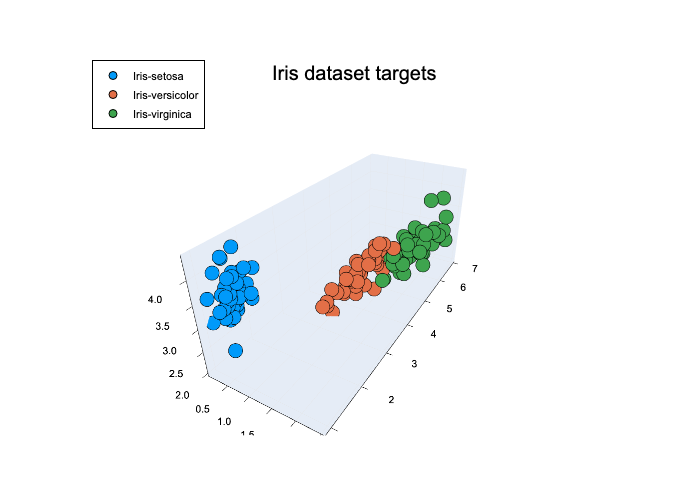

In [11]:
# Plot the data
scatter(iris.features[!, :petalwidth], iris.features[!, :petallength], iris.features[!, :sepalwidth],group = iris.targets[!, :class], legend = :topleft, title = "Iris dataset targets") 


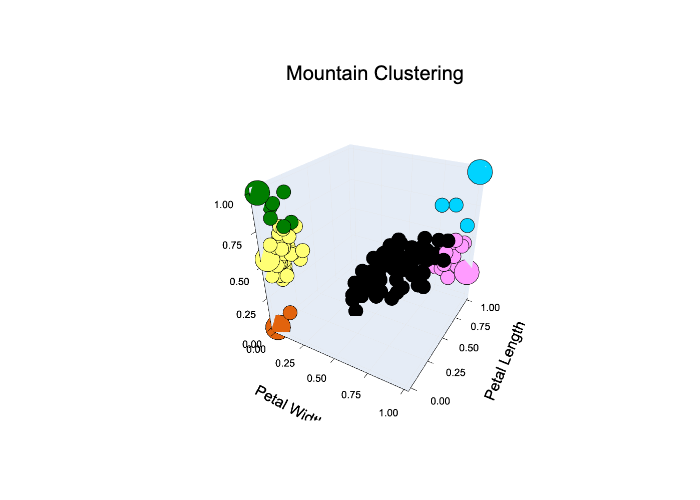

In [12]:
# Load Iris dataset
iris = Iris()
# Normalize data in [0, 1]
X = Matrix(iris.features[!, [:petalwidth, :petallength, :sepalwidth]])
dt = fit(UnitRangeTransform, X, dims=1)
X = StatsBase.transform(dt, X)
centers, clusters = mountain_clustering(X, 0.5, 0.5, 10, euclidean_distance)
# plot clusters
plot_clusters(X, clusters, centers, "Mountain Clustering", "Petal Width", "Petal Length", "Sepal Width")